Мини-анализ данных о клиентах, совершающих операции на разных платформах. Посмотрим, какой клиент совершил больше всего успешных операций, с какой платформы осуществляется больше всего операций, какой платформой больше всего пользуются премиумные клиенты, построим несколько визуализаций, н-р, график распределения успешных операций.

**Описание данных:**    
user_data:   

client – идентификатор пользователя   
premium – является ли клиент премиум    
age – возраст     

logs:    

client – идентификатор пользователя   
success – результат (успех - 1, нет - 0)   
platform – платформа   
time – время в формате Unix   

In [1]:
import pandas as pd

In [5]:
# Импортируем данные, проверим размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [6]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [7]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [8]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [9]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [11]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [12]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [13]:
user_data.shape

(2954, 3)

In [14]:
logs.shape

(4500, 4)

In [15]:
# Кол-во платформ
logs.platform.nunique()

3

In [17]:
# Успешных операции
logs.query('success == True')

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772
...,...,...,...,...
4493,92584,True,computer,1585408896
4494,95152,True,computer,1585420263
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121


In [18]:
# Клиенты, совершившие наибольшее кол-во успешных операций:

logs.query('success == True') \
    .groupby('client') \
    .agg({'success':'count'}) \
    .sort_values(['success', 'client'], ascending =[False, True] ) \
    .head(9) \
    .reset_index() \
    .client \
    .tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [26]:
# То же самое, другим способом:

logs.query('success == True').client.value_counts().head(9).index.to_list()

[36165, 61468, 12179, 61473, 78349, 28719, 92584, 52870, 82563]

In [27]:
# С какой платформы осуществляется наибольшее кол-во операций:

logs.query('success == True').platform.value_counts().idxmax() 

'phone'

In [36]:
# Какая платформа наиболее популярна среди премиумных клиентов:
df = logs.merge(user_data).groupby('platform') \
    .agg({'premium':'sum'})
df

,premium
platform,
computer,150.0
phone,246.0
tablet,24.0


In [37]:
df.squeeze().idxmax()

'phone'

In [67]:
df = logs.merge(user_data). \
        query('premium == True').platform.value_counts().idxmax()
df

'phone'

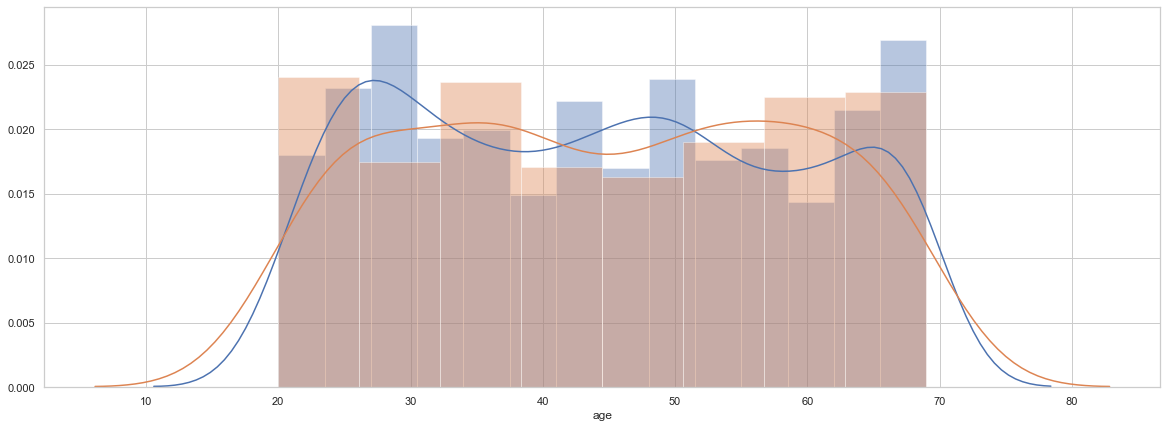

In [76]:
# Распределение возраста клиентов в зависимости от типа клиента (премиум или нет):

import seaborn as sns

df=logs.merge(user_data)

sns.set(style='whitegrid',rc={'figure.figsize':(20,7)})
ax = sns.distplot(df.query('premium == False').age)
ax = sns.distplot(df.query('premium == True').age)

In [64]:
#  График распределения числа успешных операций (число успешных операций\ число клиентов, совершивших столько 
# успешных операций)

df = logs.query('success == True') \
    .groupby('client').agg('sum').success
df

client
40       1.0
50       1.0
75       1.0
81       1.0
132      1.0
        ... 
99926    1.0
99927    1.0
99931    1.0
99973    1.0
99993    1.0
Name: success, Length: 2845, dtype: float64

In [63]:
# Колв-во операций - кол-во клиентов, которые их совершили:
logs.query('success == True') \
    .groupby('client').agg('sum').success.value_counts()

1.0     2791
2.0       43
41.0       9
3.0        1
40.0       1
Name: success, dtype: int64

Text(0.5, 1.0, 'График распределения числа успешных операций\n')

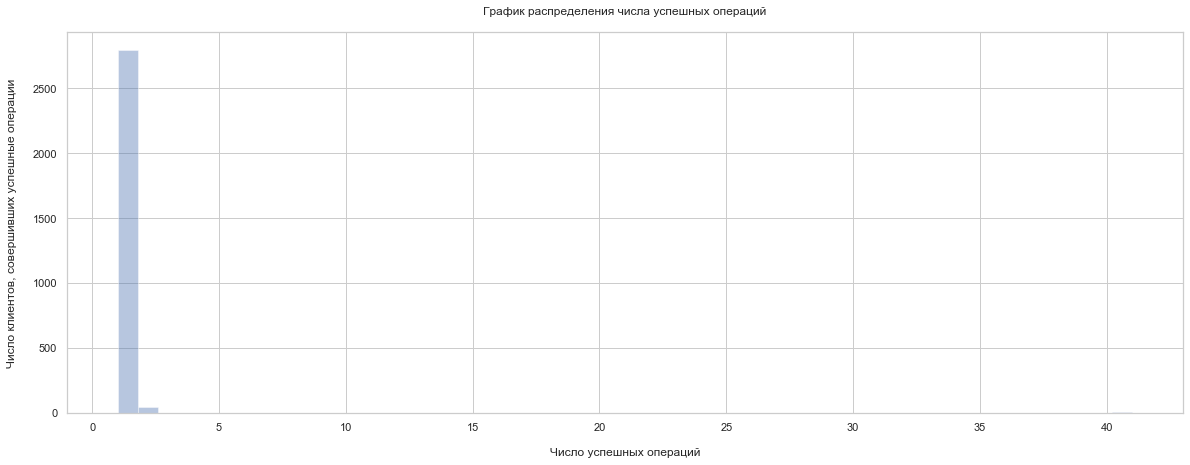

In [67]:
# Строим график:

sns.set(style='whitegrid',rc={'figure.figsize':(20,7)})

ax = sns.distplot(df, kde=False)

ax.set_xlabel('\nЧисло успешных операций')
ax.set_ylabel('Число клиентов, совершивших успешные операции\n')
ax.set_title('График распределения числа успешных операций\n')

Text(0, 0.5, 'Число успешных операций\n')

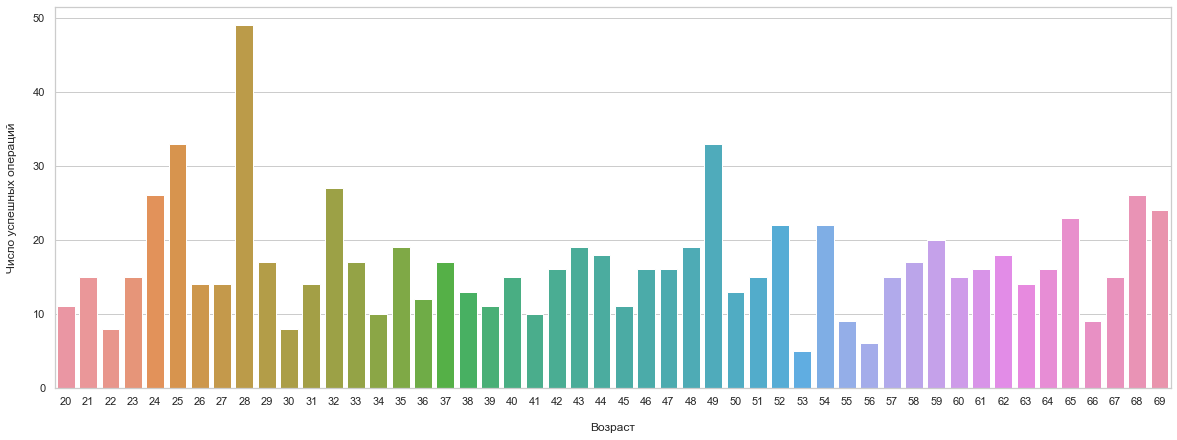

In [73]:
# График числа успешных операций, сделанных на платформе computer, в зависимости от возраста с помощью barplot и countplot:

df = logs.merge(user_data).query('platform == "computer" and success == True') \
            .groupby('age', as_index = False).agg('sum')

sns.set(style='whitegrid',rc={'figure.figsize':(20,7)})
ax = sns.barplot(x="age",y="success",data=df)

ax.set_xlabel('\nВозраст')
ax.set_ylabel('Число успешных операций\n')

Text(0, 0.5, 'Число успешных операций\n')

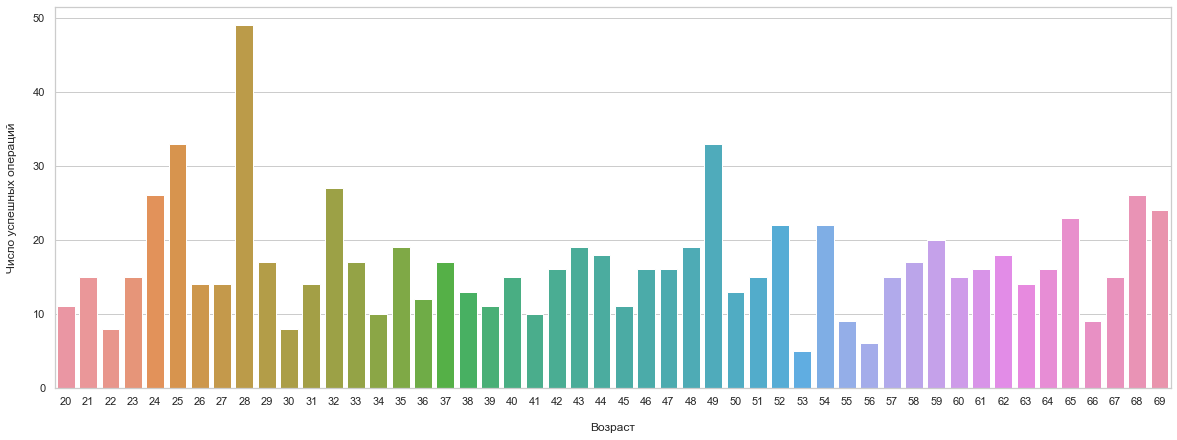

In [72]:
df = logs.merge(user_data).query('platform == "computer" and success == True')

sns.set(style='whitegrid',rc={'figure.figsize':(20,7)})

ax = sns.countplot(x="age",data=df)
ax.set_xlabel('\nВозраст')
ax.set_ylabel('Число успешных операций\n')